### ***Credit Card Default Segmentation***

DATASET : [credit_card_default](P1G6_Set-1_Daffa.Darwin.csv)  

based on the data from the provided link, this task tended to find the customer segmentation from the credit card usage for the last six months. 

### ***2. Query SQL***

Queries that have been used in the google BigQuery are below: 

```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_005_bsd.credit-card-information`
WHERE MOD(CAST(CUST_ID AS INT64), 2) = 1
```


> Explanation

- **(SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_005_bsd.credit-card-information`)** means we want to pick the data about credit-card-information where it is located in `ftds-hacktiv8-project.phase1_ftds_005_bsd`  
- ***(WHERE MOD(CAST(CUST_ID AS INT64), 2) = 1)*** it's a condition where we want to filter the rows and use MOD for remainders when `CUST_ID` divided by 2. If the remainder is 1, it means the `CUST_ID` is an odd number. So, this condition selects only those rows where `CUST_ID` is odd.

### ***3. Import Libraries***

The Libraries that will be used for this task are below:

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
#  Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from feature_engine.outliers import Winsorizer
from sklearn.metrics import silhouette_score,silhouette_samples

# elbow & silhouette for PCA 
from yellowbrick.cluster import KElbowVisualizer

# Model Saving
import pickle
import json

# Warning notes removal 
import warnings
warnings.filterwarnings ('ignore')
warnings.simplefilter ('ignore')
warnings.filterwarnings ('ignore', category=FutureWarning)

### ***4. Data Loading***

this part shows about the data which has been configured through SQL in Google BigQuery above in `2. Query SQL` with the queries that fulfill the task's requirement, then load to check whether the data is eligible (without cleaning the data to make it more decent) or ineligible (through cleaning data for make it decent) for the EDA. 

In [2]:
# write your code here

# Basic Data Exploration
pdf = pd.read_csv('credit_card_default.csv')

# Call the function
pdf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       21

In [3]:
# Show the first 10 Data
pdf.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

In [4]:
# Show the last 10 data
pdf.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

- ***Data Types***  

this section's purpose is to look at the type of data to match within the table given above. Once it is checked, we can proceed to the next step. 

In [5]:
# Detail information display
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

now that for the types checking and matching with the table above, it is approved that the types matched with task given. after we secured the data type checking, we would like to check the duplicated rows in the dataset

- ***Duplicate Detection***  

this section is to check whether the dataset has the duplicated rows in the dataset or not, this affect the process further if we don't remove the duplication, because the effect is significant. 

In [6]:
# Detecting the duplicated rows in the data
pdf.duplicated().sum()

np.int64(0)

the dataset that will be used has no duplication. that means we can move on to the next step which is dealing with the missing values to prevent the unexpected result in the end of the experiment process of this task. 

- ***IMV Handling***  

here in this part is to identify the missing values to reduce the bias result in the dataset when we conduct a data research. 

In [7]:
# IMV Checking
pdf.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

`MINIMUM_PAYMENTS` has 155 IMV so we need to handle it since the characters tended to be Missing Not At Random `MNAR`, so we need to fill it with `0` value.

In [8]:
# Ensure missing values in 'MINIMUM_PAYMENTS' are set to np.nan
pdf['MINIMUM_PAYMENTS'] = pdf['MINIMUM_PAYMENTS'].replace('', 0)
pdf['MINIMUM_PAYMENTS'] = pdf['MINIMUM_PAYMENTS'].fillna(0)

# Display missing values after handling
pdf.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now the IMV has been replaced by `0` successfully, then the overall result still important since the dataset's characteristic is about credit utility, then we proceed to the EDA where we doing research deeper about what kind of the dataset do we have to do.

### ***5. Exploratory Data Analysis***

this section is for the detail research about the data which will be conducted for the clustering. For example in this task, we would like to know the data based on the credit limit for people that use credit in general, what do they do when they have the credit, and what is the purpose of them to have a credit. 

In [9]:
# write your code here

# Display the columns within the dataset
pdf.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

based on the result above, we would like to know what are the columns within the dataset for us to pick a countermeasure to get to know better about the dataset. 

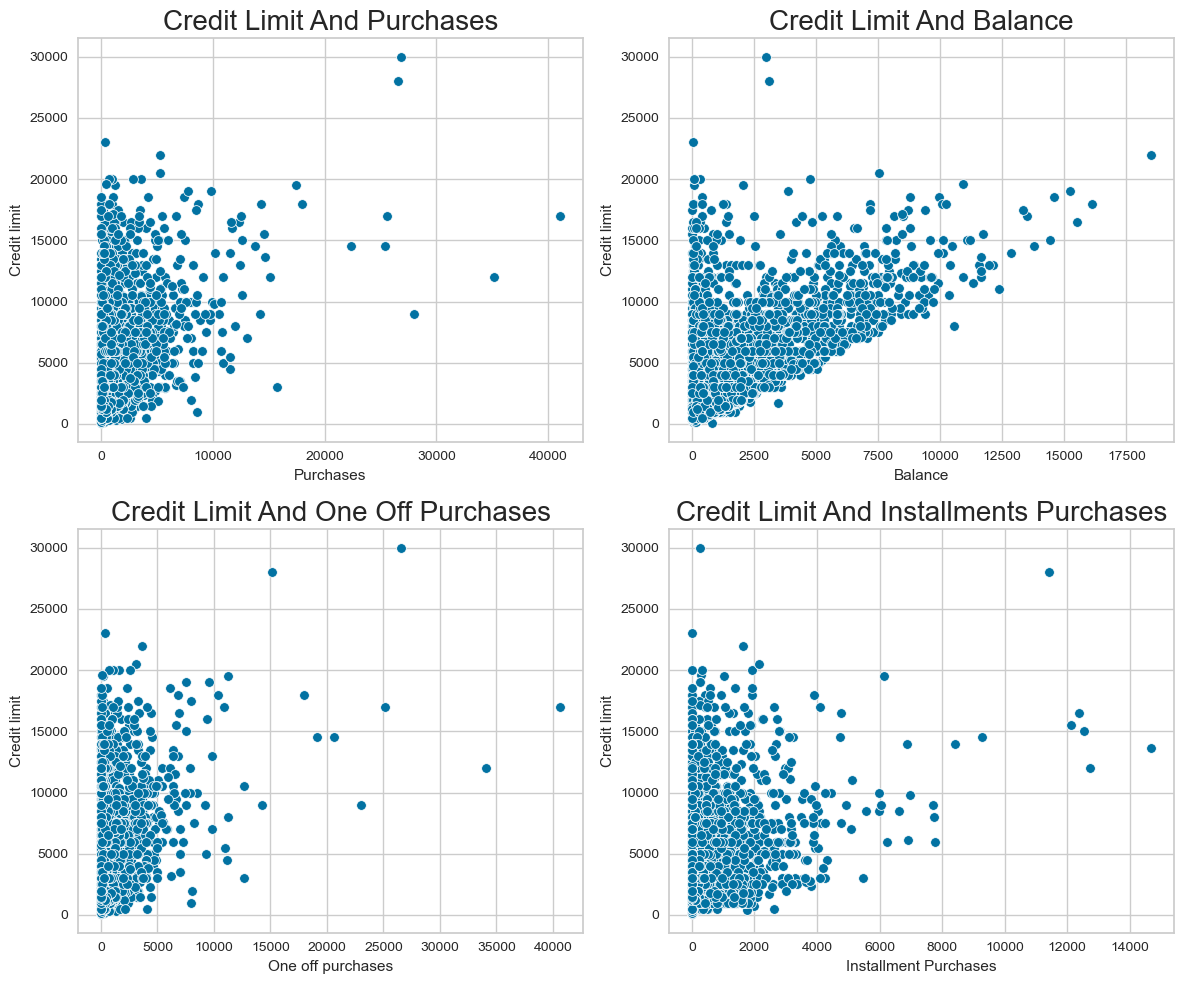

In [10]:
# Display the Credit limit to 
# Purchases, Balance, OneOff Purchases, and installments purchases


plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.scatterplot(x='PURCHASES', y='CREDIT_LIMIT', data=pdf)
plt.title('Credit Limit And Purchases', fontsize=20)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(x='BALANCE', y='CREDIT_LIMIT', data=pdf)
plt.title('Credit Limit And Balance', fontsize=20)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(x='ONEOFF_PURCHASES', y='CREDIT_LIMIT', data=pdf)
plt.title('Credit Limit And One Off Purchases', fontsize=20)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(x='INSTALLMENTS_PURCHASES', y='CREDIT_LIMIT', data=pdf)
plt.title('Credit Limit And Installments Purchases', fontsize=20)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

plt.tight_layout()
plt.show()


Initially, let's talk about several buying categories such as purchases, one-off purchases, and installment purchases. Given that we would naturally anticipate that purchases to increase in tandem with an increase in credit limit, these scatter plots are intriguing. Although the graphs tell a different tale, it makes no sense to obtain a credit card with a high limit if we do not intend to use it. The credit limit does not appear to be strongly correlated with any of these factors. In reality, purchases typically remain at zero as credit limits rise. Once more, this demonstrates how credit card holders actually prefer to use their credit by keeping their debt low. This suggests that credit cards are more often used as instruments for credit utilization than as means of making purchases.  

as for the balance, there appears to be a stronger correlation between rising credit limits and rising balances, although it is also evident that there are instances where credit limits rise while balances remain at zero.




### ***6. Feature Engineering***


Feature engineering in clustering involves selecting, transforming, or creating new features to improve clustering algorithm performance. Its goal is to enhance cluster discrimination by emphasizing relevant patterns and reducing noise. Techniques like dimensionality reduction, scaling, encoding categorical variables, and incorporating domain knowledge are commonly used to prepare data for clustering, leading to more accurate cluster assignments.

- ***Handling Outliers***  

this part is to look at each column with the distribution shape's of the data to be scaled on the next step. from all the columns provided in the dataset, we want to know which columns are normally distributed, skewed, and skewed extremely by dealing with the outliers from the dataset given. 

In [11]:
# Handling the outlier
normal = []
skew = []
extremeSkew = []

column = ['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# create a condition for the whole columns after being filtered
for i in column: 
    skewness = pdf[i].skew()
    if -0.5 < skewness < 0.5:
        normal.append(i)
    elif -1 <= skewness <= -0.5 or 0.5 <= skewness <= 1:
        skew.append(i)
    elif skewness < -1 or skewness > 1: 
        extremeSkew.append(i)

print(f'the normal result is: {normal}')
print(f'the skew result is: {skew}')
print(f'the extreme skew is: {extremeSkew}')  

the normal result is: []
the skew result is: []
the extreme skew is: ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


All the columns that has the title `FREQUENCY` is removed is because we count it as a categorical column even the data is in number. fortunately, from the task given, every columns that has `FREQUENCY`'s description support the reason why it is categorical, so we removed it and only focus on the numerical columns which written in the code above. Moreover, as we can see the results, the dataset either not have normal distribution or skewed distribution but extreme skew is exist within the dataset. Therefore, we will deal it by using Winsorizer method since the outliers is important for the overall dataset. 

In [12]:
# Create a Winsorizer object
winsorizer = Winsorizer(capping_method='iqr',  # using Interquartile Range for capping
                        tail='both',  # cap both tails (left and right)
                        fold=3)  # set the fold multiplier for IQR method

# Apply Winsorizer to the columns with extreme skewness
for col in extremeSkew:
    if col != 'TENURE':
        pdf[col] = winsorizer.fit_transform(pdf[[col]])

print(f'Winsorized data for extreme skew features:')
print(pdf[extremeSkew])


Winsorized data for extreme skew features:
          BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0        3.833185      45.00             45.00                     0.0   
1        0.000000     176.03            176.03                     0.0   
2      757.964752     157.40            157.40                     0.0   
3      264.566591    1150.00           1150.00                     0.0   
4      440.613643     600.00            600.00                     0.0   
...           ...        ...               ...                     ...   
4470  7816.984649       0.00              0.00                     0.0   
4471  1040.030221       0.00              0.00                     0.0   
4472  1322.818587       0.00              0.00                     0.0   
4473  1060.391273       0.00              0.00                     0.0   
4474  3447.674222     205.00            205.00                     0.0   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \

as we can see the result of the outliers after being capped, we can see a variative values of outliers and the reason we don't remove the outliers is to keep the dataset because the overall data is quite important to each other. On the other hand, supporting reason why the outliers is not removed is because we would like to know for every single observations (rows) represents customers that use credit card. 

In addition, the winsorized data table has 12 columns and 4475 rows. Because of their relatively greater values, features like `BALANCE`, `PURCHASES`, and `INSTALLMENTS_PURCHASES` may be skewed. On the other hand, attributes such as `CASH_ADVANCE`, `CASH_ADVANCE_TRX`, and `PURCHASES_TRX` are primarily null, indicating possible insignificance. Furthermore, across observations, `MINIMUM_PAYMENTS` consistently seem lower than `PAYMENTS`.


- ***Split between Categorical and Numerical***  

After addressing outliers, splitting the dataset into numerical and categorical columns guarantees that each type of data receives the proper preprocessing care, preserves data integrity, makes modeling easier, and enhances the dataset's readability and clarity.

In [13]:
# Split the numerical & categorical columns
categoricalColumns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
numericalColumns = ['BALANCE', 'PURCHASES',
'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Call the result after split
print(f'The numerical columns: {numericalColumns}')
print(f'The categorical columns: {categoricalColumns}')

The numerical columns: ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
The categorical columns: ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']


the split is done manually due to the given descriptions for every columns in the task. for each columns that has label `FREQUENCY` indicates how much people spending their credit card, either their purchases, purchases by one-off or installments, or how many do they withdraw their cash from their credit card based on the balance which we conclude it as a categorical. meanwhile the numerical is purely number that consists of the prices within the variative elements such as balance within the credit card, prices of each purchases (`ONEOFF` and `INSTALLMENTS`) credit limit based on the capacity of the credit (in cash) and how many monies for withdrawal in `CASH_ADVANCE`

In [14]:
# Create the variables for scaling
pdfNum = pdf[numericalColumns]

the variable above is for the scaling process through PCA. the reason we only use numerical columns is because the task tended to use K-Means which the K-Means itself only focus on the numerical datas

- ***Preliminary PCA process*** PCA proceed (we do scaling first ???)  

in this part, we scaled the numerical column that has been split to be selected through PCA 

In [15]:
# Scaling before doing PCA
scaler = MinMaxScaler()

# Input the scaling variables to update for scaling
pdfNumScaled = scaler.fit_transform(pdfNum)

# call the updated variable after scaling
print('the scaled of Feature matrices training: ')
print(pdfNumScaled)



the scaled of Feature matrices training: 
[[4.90366193e-04 1.04870660e-02 1.95577344e-02 ... 0.00000000e+00
  0.00000000e+00 3.33333333e-01]
 [0.00000000e+00 4.10230715e-02 7.65055109e-02 ... 0.00000000e+00
  0.00000000e+00 3.33333333e-01]
 [9.69638276e-02 3.66814262e-02 6.84086089e-02 ... 9.93624283e-01
  0.00000000e+00 3.33333333e-01]
 ...
 [1.69223639e-01 0.00000000e+00 0.00000000e+00 ... 1.17805339e-01
  0.00000000e+00 8.33333333e-01]
 [1.35652214e-01 0.00000000e+00 0.00000000e+00 ... 1.04342563e-01
  0.00000000e+00 8.33333333e-01]
 [4.41049123e-01 4.77744116e-02 8.90963457e-02 ... 3.07978021e-01
  0.00000000e+00 8.33333333e-01]]


In [16]:
pca = PCA()
pca.fit(pdfNumScaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

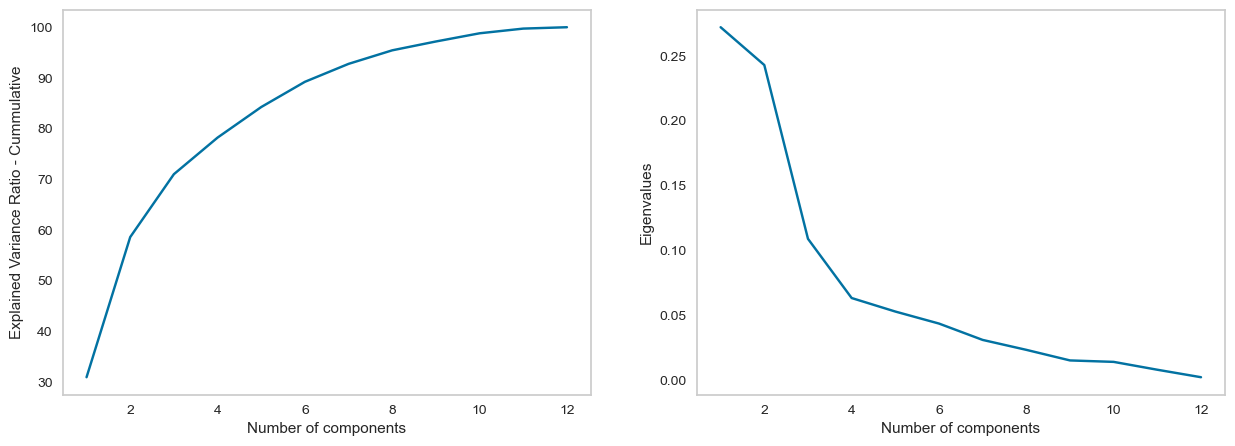

In [17]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 13), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 13), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [18]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(8)

In [19]:
pca = PCA(n_components=0.95)
pca.fit(pdfNumScaled)

pdfNumScaled_pca = pca.transform(pdfNumScaled)

  File "c:\Users\5002328\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\5002328\AppData\Local\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\5002328\AppData\Local\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


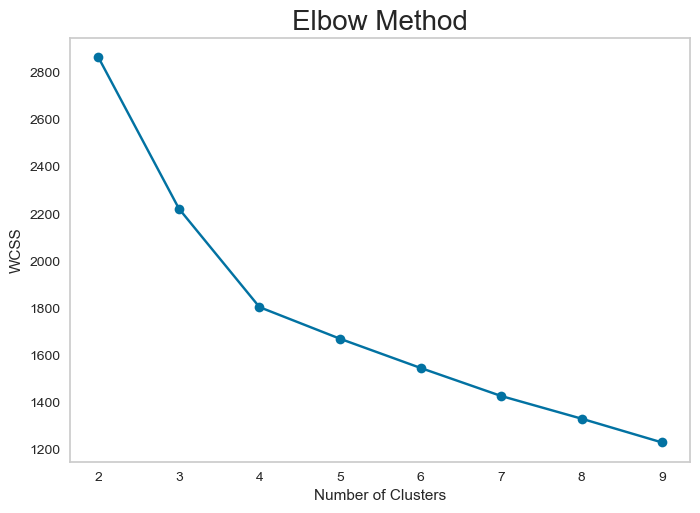

In [20]:
# Find the best number of Clusters by Elbow Method

wcss = []
random_state = 10
max_cluster = 9
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(pdfNumScaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

as we can see the graphs above, we tended to pick the elbow at 4 due to the clarity of the angle of the elbow which we will conduct the clustering number. but at this point, since elbow method is quite subjective for deciding the number of clustering, we will conduct silhouette method to double-check that the four clusters is the decision we use. 

In [21]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3613686994201876
For n_clusters = 3 The average silhouette_score is : 0.3214988964611703
For n_clusters = 4 The average silhouette_score is : 0.32705839083443583
For n_clusters = 5 The average silhouette_score is : 0.3246701507672996
For n_clusters = 6 The average silhouette_score is : 0.2886590520418272
For n_clusters = 7 The average silhouette_score is : 0.29966948126503185
For n_clusters = 8 The average silhouette_score is : 0.2914445054276567


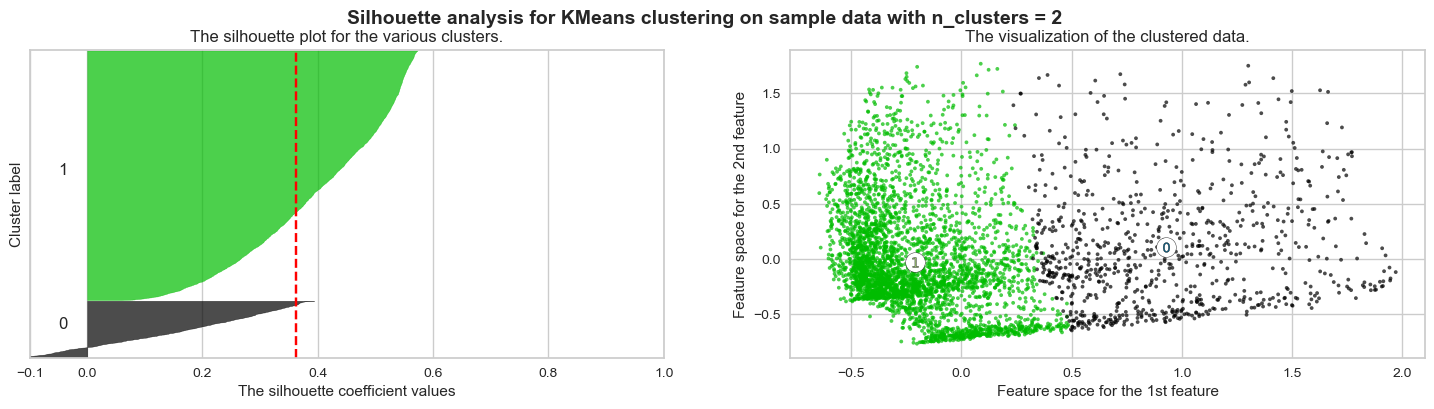

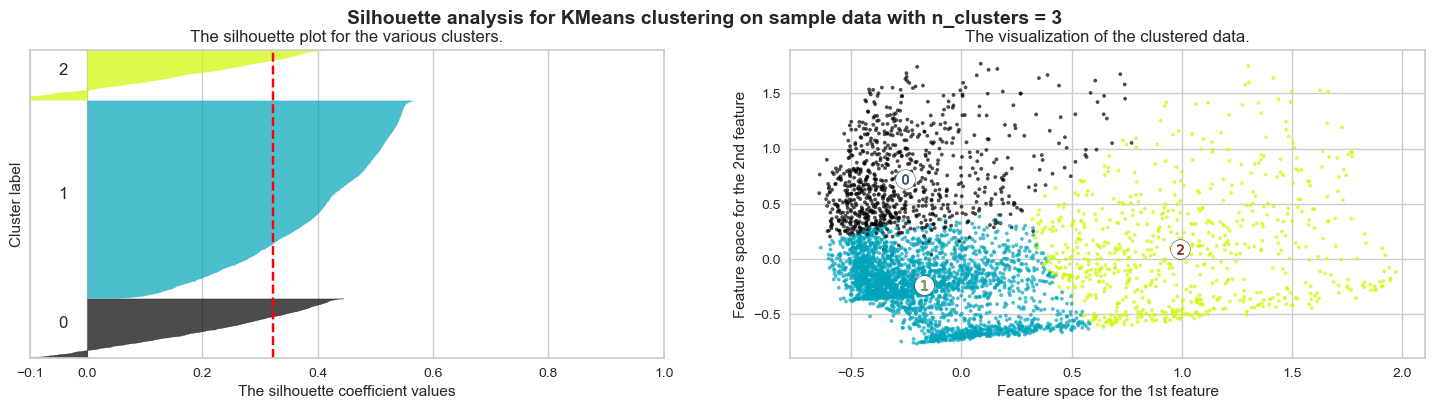

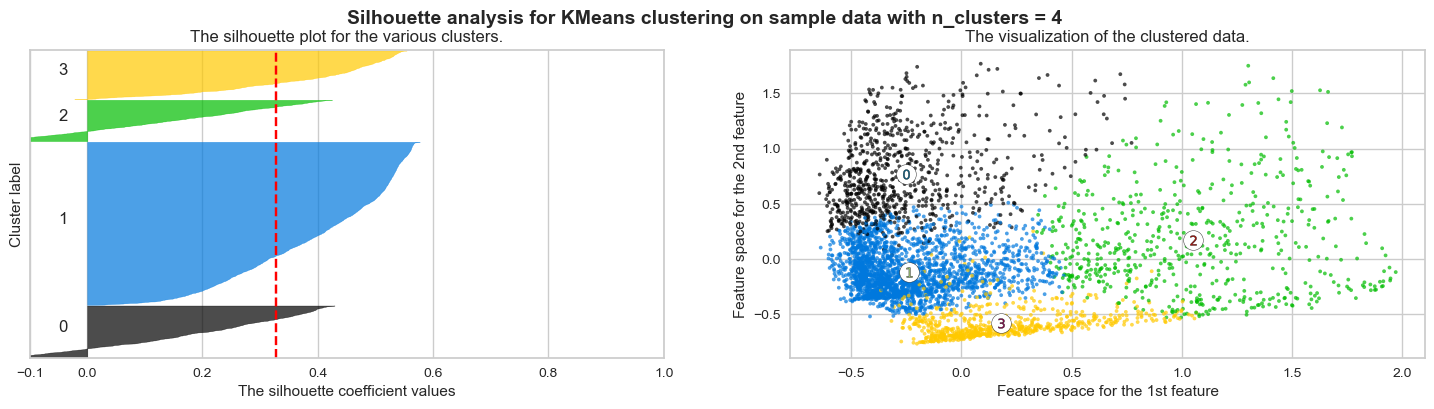

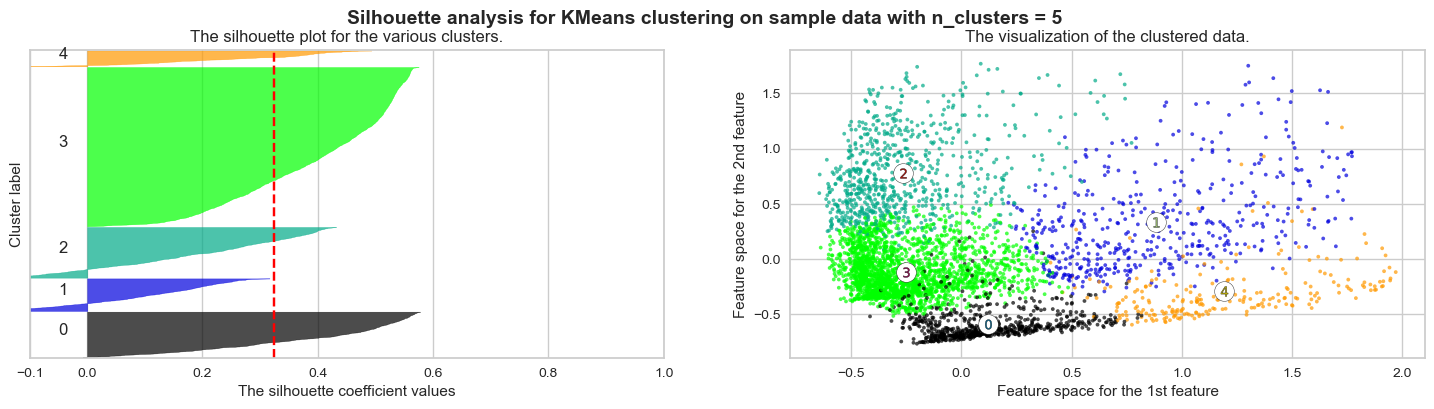

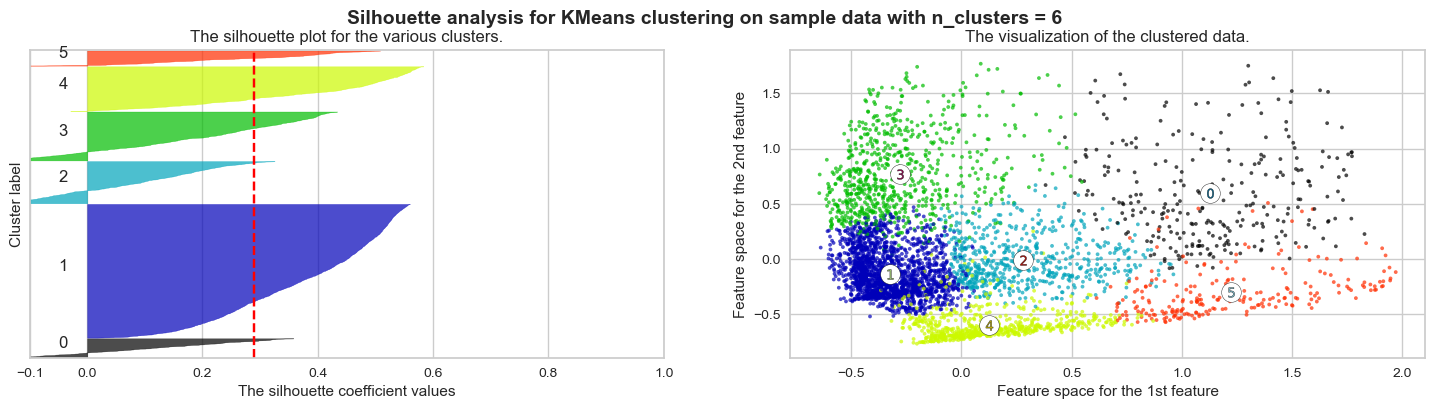

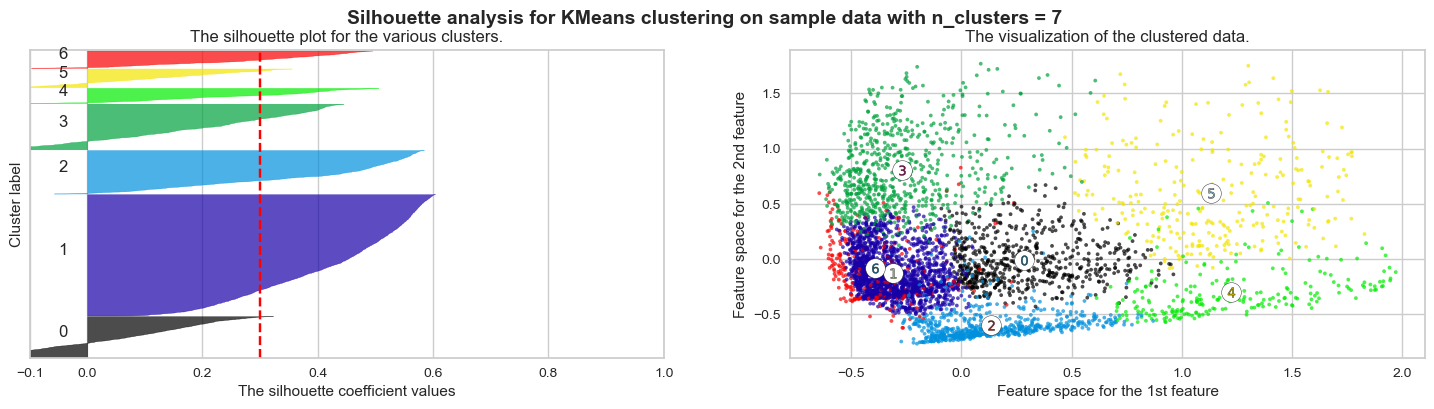

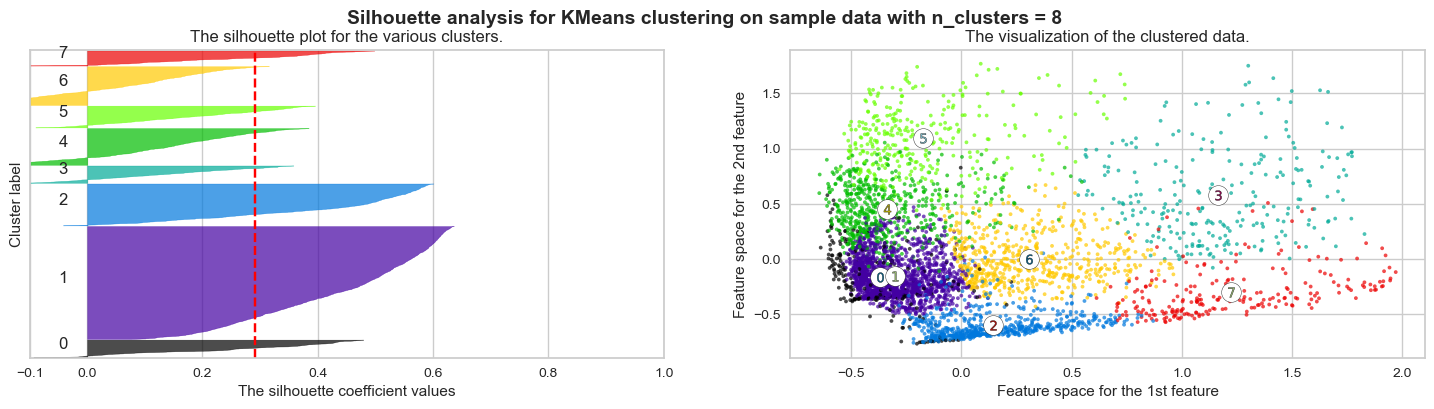

In [22]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), pdfNumScaled_pca, random_state) 

the reason we pick the n_cluster : 4 is because the thickness of the silhouette distributed fairly enough for the data that about to be clustered. 

### ***7. Model Definition***

this section is to use the model based on the task given which is KMeans for clustering since we focus on the dataset that contains numerical

In [23]:
# write your code here

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

### ***8. Model Training***

this part is to implement the model that has been prepared to be implemented above

In [24]:
# write your code here

pred = km.fit_predict(pdfNumScaled_pca)
pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [25]:
# write your code here

pdf['CLUSTER'] = pred 
pdf 

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  7816.984649              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                16              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0        0.000000          0.000000               0.0       8        1  
1        0.000000          0.000000               0.0       8        1  
2     1494.480376       2638.598410               0.0       8        1  
3     3029.380326         85.428885               0.0       8        1  
4      215.316424        137.846006               0.0       8        1  
...           ...               ... 

In [26]:
# Save the current DataFrame with cluster labels to a CSV file
pdf.to_csv('credit_card_clusters.csv', index=False)

In [27]:
# doule-check the number of clusters since we use 4 clusters to experiment
pdf['CLUSTER'].unique() # type: ignore

array([1, 3, 2, 0], dtype=int32)

### ***9. Model Evaluation***

in this part, the model evaluation tends to be the visualisation of the clustering in details after implemented the model above. Moreover, this part tends to be an exploratory clustering analysis (ECA) after being customised with the model by using K-Means Algorithm since we focused on the numerical datas to determine each characteristics of each clusters.   

<Axes: >

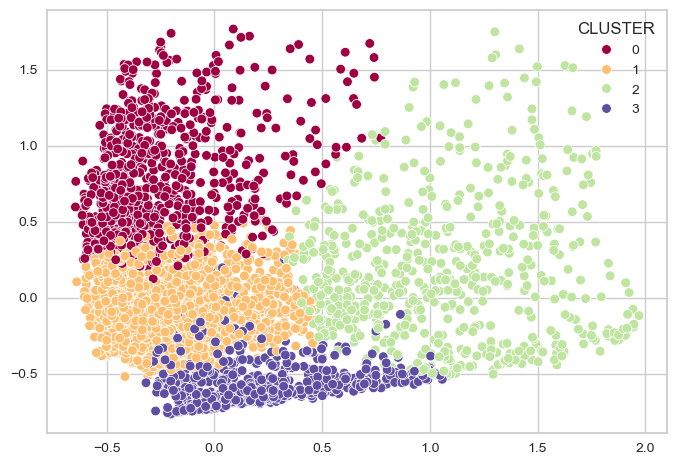

In [28]:
# Visualising the cluster in 2d
pca_2d = PCA(n_components=2) 
pca_2d.fit(pdfNumScaled) 

pdfNumScaled_pca_2d = pca_2d.fit_transform(pdfNumScaled) 

sns.scatterplot(x=pdfNumScaled_pca_2d[:,0], y=pdfNumScaled_pca_2d[:,1], hue=pdf['CLUSTER'], palette='Spectral') 

now we can see the four clusters that distributed evenly from the silhouette selection which we already choose above. from this graphs is about to begin the exploration clustering analysis based on the dataset. 

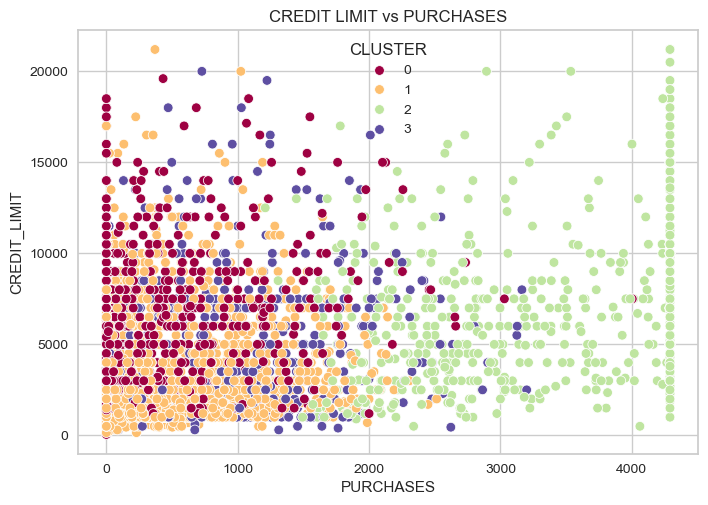

In [29]:
fig, ax = plt.subplots() 
ax.set_title('CREDIT LIMIT vs PURCHASES')
ax.set_xlabel('PURCHASES')
ax.set_ylabel('CREDIT_LIMIT')
sns.scatterplot(data=pdf, x='PURCHASES',y='CREDIT_LIMIT', hue='CLUSTER', ax=ax, palette='Spectral') 
plt.show() 

***Purchases based on Credit Limit***

We can see the graph above that we measure the customers based on their credit limit and connect to the first financial measures and here are the breakdown for each clusters. 

1.  **Cluster 1 (0 on the graphs)**  
    The largest credit limits and purchasing quantities are found in this cluster. This implies that the customers in this cluster have a propensity for large purchases. 

2. **Cluster 2 (1 on the graphs)**  
    This cluster is greater than the other two clusters despite having credit restrictions and purchasing quantities that are lower than those of Cluster 1. This implies that although maybe not to the same degree as those in Cluster 1, customers in this cluster also have high purchasing habits.

3. **Cluster 3 (2 on the graphs)**  
    Credit limitations and purchasing amounts are lowest in Cluster 3. This implies that the customers within this group have less extravagant spending patterns.

4. **Cluster 4 (3 on the graphs)**  
    This cluster is less than Clusters 1 and 2, but it has credit restrictions and purchasing quantities that are larger than Cluster 3. This implies that the customers within this group have modest spending patterns.


While not very strong, the scatter plot generally indicates that there is a positive correlation between spending and credit limit. This indicates that factors other than credit limit have a significant impact on expenditure. 

Observable outliers in the data may point to mistakes or peculiar spending patterns among specific customers in each clusters. While credit limit and spending have a positive connection, this does not necessarily indicate a causal relationship; raising credit limits does not always result in higher spending.




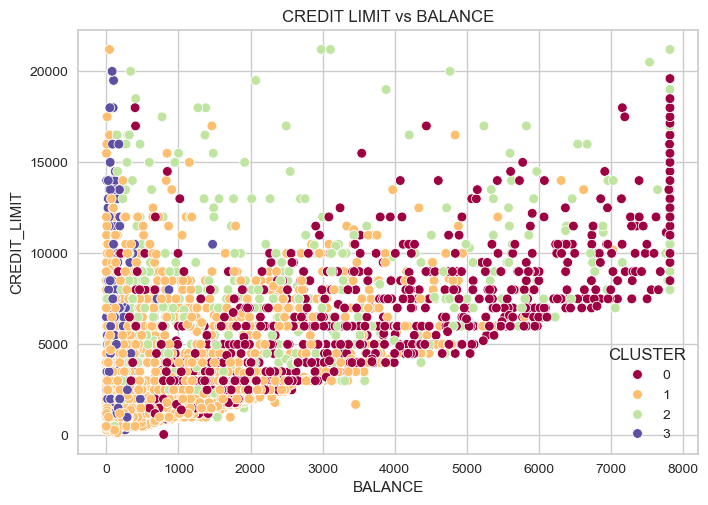

In [30]:
fig, ax = plt.subplots() 
ax.set_title('CREDIT LIMIT vs BALANCE')
ax.set_xlabel('BALANCE')
ax.set_ylabel('CREDIT_LIMIT')
sns.scatterplot(data=pdf, x='BALANCE',y='CREDIT_LIMIT', hue='CLUSTER', ax=ax, palette='Spectral') 
plt.show() 

***Balances based on Credit Limit***

We can see the graph above that we measure the customers based on their credit limit and connect to the second financial measures and here are the breakdown for each clusters. 

1.  **Cluster 1 (0 on the graphs)**  
    Credit limits and balances are highest in Cluster 1. This implies that the customers in this cluster typically have large balances and credit limits.

2. **Cluster 2 (1 on the graphs)**  
    Credit limits and balances in this cluster are larger than those in the other two clusters, but they are lower than those in Cluster 1. This indicates that although maybe not to the same degree as those in Cluster 1, customers in this cluster also have substantial credit limits and balances.

3. **Cluster 3 (2 on the graphs)**  
    The credit limits and balances in this cluster are the lowest. This implies that the customers in this cluster typically have low balances and credit limits.

4. **Cluster 4 (3 on the graphs)**  
    Credit limits and balances in this cluster are more than those in Cluster 3, but they are lower than those in Clusters 1 and 2. This shows that the customers in this cluster typically hold modest amounts and have credit lines that are moderate in size.


 The scatter plot indicates that, on the whole, there is a weak but positive correlation between credit limit and balance. This indicates that a variety of factors other than credit limit affect balance.

Certain data points seem to be anomalies; this could be because of mistakes or because they represent particular customer spending patterns. Although the credit limit and balance have a positive correlation, this does not mean that they are directly related; credit limit increases are not always accompanied by bigger balances.

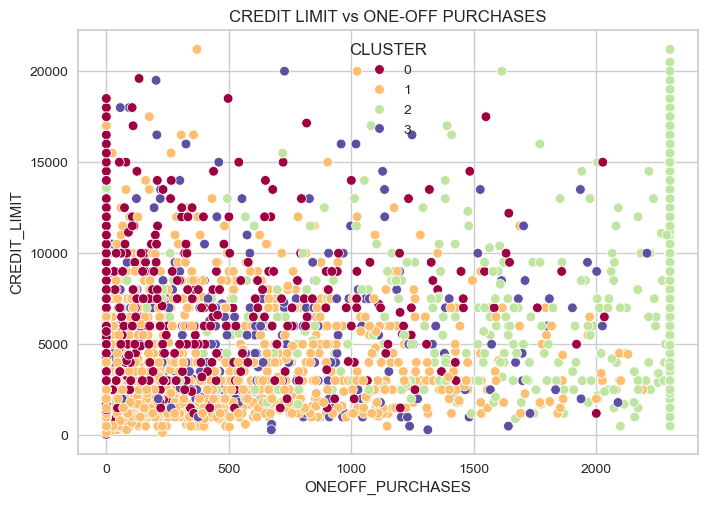

In [31]:
fig, ax = plt.subplots() 
ax.set_title('CREDIT LIMIT vs ONE-OFF PURCHASES')
ax.set_xlabel('ONEOFF_PURCHASES')
ax.set_ylabel('CREDIT_LIMIT')
sns.scatterplot(data=pdf, x='ONEOFF_PURCHASES',y='CREDIT_LIMIT', hue='CLUSTER', ax=ax, palette='Spectral') 
plt.show() 

***One-off purchases based on Credit Limit***

We can see the graph above that we measure the customers based on their credit limit and connect to the third financial measures and here are the breakdown for each clusters. 

1.  **Cluster 1 (0 on the graphs)**  
    Both credit limits and one-time purchases are higher in this cluster. This implies that customers in this cluster probably make big, one-time purchases and have significant credit lines.

2. **Cluster 2 (1 on the graphs)**  
    Credit limitations in this cluster are higher than those in the other two clusters, but they are lower than those in Cluster 1. Additionally, their one-time purchases are often larger than those in Cluster 1 but lower than those in Cluster 2. This implies that customers in this cluster make modest one-time purchases and have credit lines ranging from moderate to high.

3. **Cluster 3 (2 on the graphs)**  
    The lowest credit limits and the fewest one-time purchases are seen in this cluster. This implies that customers in this cluster typically make modest, one-time transactions with limited credit lines.

4. **Cluster 4 (3 on the graphs)**  
    Credit limitations in this cluster are lower than in the other two clusters, although they are greater than in Cluster 3. Additionally, their one-time purchases are often lower than those of the other clusters but greater than those of Cluster 3. This implies that customers in this cluster make small-to-moderate one-time purchases and have low to moderate credit lines.


 Certain data points stand out as anomalies which could be the result of data errors or special spending habits among particular customers.

It's crucial to understand that even when there is a positive correlation between credit limit and one-time purchases, this does not necessarily indicate a causal relationship; increasing credit limits does not always result in an increase in one-time purchases.


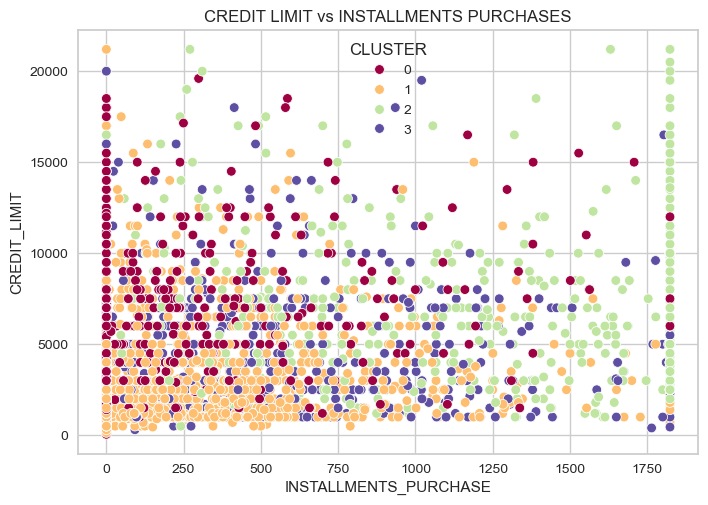

In [32]:
fig, ax = plt.subplots() 
ax.set_title('CREDIT LIMIT vs INSTALLMENTS PURCHASES')
ax.set_xlabel('INSTALLMENTS_PURCHASE')
ax.set_ylabel('CREDIT_LIMIT')
sns.scatterplot(data=pdf, x='INSTALLMENTS_PURCHASES',y='CREDIT_LIMIT', hue='CLUSTER', ax=ax, palette='Spectral') 
plt.show() 

***Installment purchases based on Credit Limit***

We can see the graph above that we measure the customers based on their credit limit and connect to the fourth financial measures and here are the breakdown for each clusters. 

1.  **Cluster 1 (0 on the graphs)**  
    In comparison to other clusters, this one has the biggest credit limit and seems to provide a greater selection of installment purchases. This implies that customers in this cluster might have large credit limits and use them for a greater variety of installment purchases.

2. **Cluster 2 (1 on the graphs)**  
    Credit restrictions and installment purchase amounts in this cluster are larger than in Clusters 3 and 4, but they are lower than in Cluster 1. This indicates that clients in this cluster probably have modest credit lines and purchase modest amounts of merchandise in installments.

3. **Cluster 3 (2 on the graphs)**  
    Both the credit limit and the amount of installment purchases are lowest in this cluster. This implies that customers in this cluster typically make modest installment payments and have limited credit lines.

4. **Cluster 4 (3 on the graphs)**  
    Credit limits and installment purchase amounts in this cluster are lower than in Clusters 1 and 2, but higher than in Cluster 3. This indicates that few to moderate installment transactions are made by customers in this cluster, who have low to moderate credit limits.


there is a strong positive correlation between credit limits and installment purchases. This means that customers with higher credit limits tend to make larger installment purchases.

additional arguments why the correlation between the credit limits and installment purchases is strong [Life With Amex](https://www.americanexpress.com/ca/en/articles/life-with-amex/learn/credit-card-installment-plan/#:~:text=When%20you%20sign%20up%20for,back%20to%20your%20credit%20limit.)

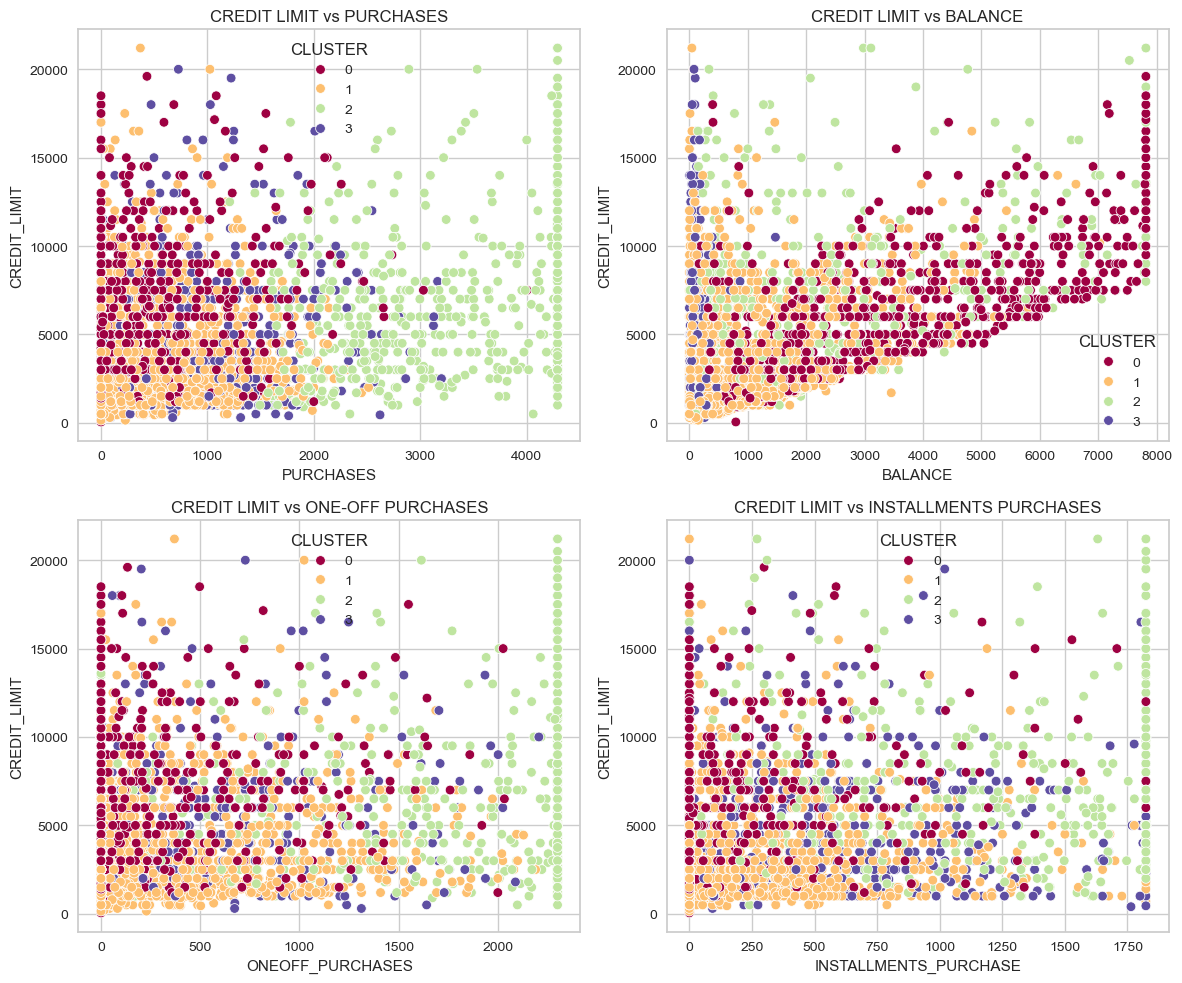

In [33]:
plt.figure(figsize=(12, 10)) 

plt.subplot(2,2,1) 
ax = plt.gca() 
sns.scatterplot(data=pdf, x='PURCHASES',y='CREDIT_LIMIT', hue='CLUSTER', ax=ax, palette='Spectral') 
ax.set_title('CREDIT LIMIT vs PURCHASES')
ax.set_xlabel('PURCHASES')
ax.set_ylabel('CREDIT_LIMIT')

plt.subplot(2,2,2) 
ax = plt.gca() 
sns.scatterplot(data=pdf, x='BALANCE',y='CREDIT_LIMIT', hue='CLUSTER', ax=ax, palette='Spectral') 
ax.set_title('CREDIT LIMIT vs BALANCE')
ax.set_xlabel('BALANCE')
ax.set_ylabel('CREDIT_LIMIT')

plt.subplot(2,2,3) 
ax = plt.gca() 
sns.scatterplot(data=pdf, x='ONEOFF_PURCHASES',y='CREDIT_LIMIT', hue='CLUSTER', ax=ax, palette='Spectral') 
ax.set_title('CREDIT LIMIT vs ONE-OFF PURCHASES') 
ax.set_xlabel('ONEOFF_PURCHASES')
ax.set_ylabel('CREDIT_LIMIT')

plt.subplot(2,2,4) 
ax = plt.gca() 
sns.scatterplot(data=pdf, x='INSTALLMENTS_PURCHASES',y='CREDIT_LIMIT', hue='CLUSTER', ax=ax, palette='Spectral') 
ax.set_title('CREDIT LIMIT vs INSTALLMENTS PURCHASES')
ax.set_xlabel('INSTALLMENTS_PURCHASE')
ax.set_ylabel('CREDIT_LIMIT')

plt.tight_layout() 
plt.show() 


to conclude all those four graphs which we classify the financial measures such as purchases, balance, one-off purchases, and installments purchases, based on credit limit-- here are the whole characteristics for each four clusters: 

1. ***Cluster 1 (0 on the graph)***:  
    The customers in the Cluster 1 is characterized by the greatest credit limits and buy quantities, as well as the highest balances and a tendency toward large one-time and installment purchases. These factors point to a high credit use rate across a variety of transaction types and huge purchase volumes.  

2. ***Cluster 2 (1 on the graph)***:  
    Although not as large as Cluster 1, customers in Cluster 2 show higher credit limits and balances in comparison to the other clusters. They also show significant purchasing patterns in a variety of categories, such as small one-time and installment purchases, indicating a balanced spending pattern with credit lines ranging from moderate to high.

3. ***Cluster 3 (2 on the graph)***:  
    Customers in Cluster 3 generally have the lowest credit limits and balances, make small one-time and installment purchases, and generally have less ostentatious spending habits, suggesting a preference for prudent financial behavior with minimal credit utilization.

4. ***Cluster 4 (3 on the graph)***:  
    Cluster 4 shows modest spending patterns, moderate one-off purchases, and few to moderate installment transactions, indicating customers with low to moderate credit lines engaging in balanced spending behaviors. Credit limits and balances in Cluster 4 are lower than in Clusters 1 and 2, but higher than in Cluster 3.


### ***10. Model Saving***

after creating the blueprint above through PCA and modelled by using K-Means, this section is saving the blueprint for the prediction test.

In [34]:
# write your code here

# Saving the model that has been created
with open('modelScaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1) 

with open('modelPCA.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2) 

with open('modelKM.pkl', 'wb') as file_3:
  pickle.dump(km, file_3) 

with open ('numCol.txt', 'w') as file_4: 
  json.dump(numericalColumns, file_4) 

### ***11. Model Inference***

the implementation of the inference handled on a different notebook [credit_card_default_inference.ipynb](credit_card_default_inference.ipynb)

### ***12. Conclusion Extract***

***CONCLUSION***:  
based on the inference or model execution in [credit_card_default_inference.ipynb](credit_card_default_inference.ipynb), the prediction predicted that the cluster number 2 is the best cluster among all clusters provided within the blueprint following by the characteristics on the exploratory clustering analysis.  

***RECOMMENDATION***:  
Although the model has been implemented successfully, the scanning process not utilise maximally which is the output is quite-- particularly not impressed due to the all content of the dataset is numerical which led to difficult to pick the characteristics of a clusters. Thus, it would be a better implementation when the dataset contains a clear categorical data so that the cluster implementation is improved. 

### ***Clustering Knowledge***

- The meaning of  `inertia` in *K-Means Algorithm*  

    `inertia` in *K-Means Algorithm* means a cluster for a measuring their tightness in K-Means. The distances between each site and the designated cluster center are calculated. By determining the optimal locations for the cluster centers, the overall distance is to be as small as possible.

- Explanation about *Elbow Method* based on the reason, the usage, advantages-disadvantages

    1. *Elbow Method* is for determine the best and optimum number of clusters in **K-Means Algorithm** into a dataset.  
    2. the reasons to use *Elbow Method* are improved visualisation, straightforward and easy to grasp, and effective.  
    3. to use *Elbow Method*, by seeing the visualisation, we can see the elbowest point to determine the best and optimum number of clusters.  
    4.  Pros:  
          - effective on a small to medium dataset which can be implemented,  
          - simple and easy to comprehend so it takes a short time,  
          - and provides a visualisation to choose the best clusters' number.  

        Cons:  
          - tended to be subjective so there is no concrete evidence to determine the best clusters' number,  
          - the 'elbow' point might be biased based on the line diagram of `inertia` in *K-Means Algorithm*,   
          - ineffective on a complex dataset or unstructured dataset.
  